In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [195]:
df = pd.read_csv('data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Pergunta: Existem colunas com valores nulos?

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<AxesSubplot:>

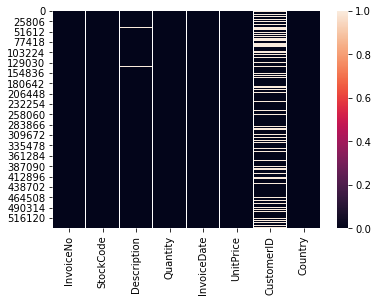

In [197]:
sns.heatmap(df.isnull())

R: Colunas 'Description' e 'CustomerID' com valores nulos

# Pergunta: Como as colunas se correlacionam?

<AxesSubplot:>

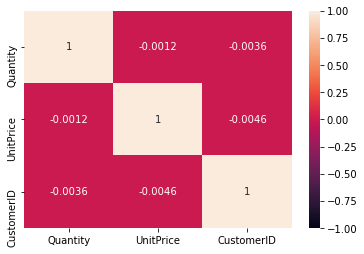

In [198]:
sns.heatmap(df.corr(),annot=True,vmin=-1)

os preços nao se dão bem pela quantidade, pois a quantidade do produto não aumenta o preço *UNITARIO*

# Pergunta: Como os valores nulos se comportam?

In [199]:
df[df['Description'].isnull() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [200]:
df[df['Description'].isnull() == True].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In [201]:
df[df['Description'].isnull() == True].Country.value_counts()

United Kingdom    1454
Name: Country, dtype: int64

In [202]:
df[df['Description'].isnull() == True].StockCode.value_counts()

35965    10
23084    10
22084     9
22451     6
21067     5
         ..
20823     1
72793     1
21700     1
84455     1
18007     1
Name: StockCode, Length: 960, dtype: int64

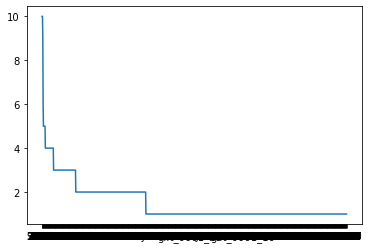

In [203]:
plt.plot(df[df['Description'].isnull() == True].StockCode.value_counts())

Grafico demonstrando que a maior parte dos produtos so efetuaram uma compra 

In [204]:
count = 0
for i in df[df['Description'].isnull() == True].StockCode.value_counts():
    if i == 1:
        count+=1
        
print(count)

633


In [205]:
df.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
20850        1
72814        1
46776a       1
84251J       1
84206B       1
Name: StockCode, Length: 4070, dtype: int64

In [206]:
df.StockCode.value_counts()[int(4070/1.3):int((4070/1.3)+20)]

84247K    12
90160D    12
90202D    12
84629     12
37489B    12
35922     11
90040B    11
20845     11
85185D    11
85130A    11
90030C    11
21761     11
72812     11
85135A    11
90036E    11
84800S    11
90098     11
90019C    11
90185D    11
23614     11
Name: StockCode, dtype: int64

respostas:
- todas as compras foram 0 dolares
- fato curioso que apena possui descrição nula é a grã-bretanha
- quase 66% dos produtos sem identificação possuem apenas uma compra
- mais de 75% dos valores identificados sao maiores que 10, ou seja, a maior quantide de produto comprado com valores nulos, se categoriza abaixo de 25% do dataset

resultado:
- excluir da base de dados esses produtos não identificados
- Criar coluna com preço total

# Proximos desafios 4/10

- Droppar 'CustomerID' *done*
- Localizar principais produtos por pais (como se fosse por artesão)
- Fazer relação de produto mais caro por quantidade
- Transformar 'InvoiceDate' em datatime
- Excluir valores nulos (dropna) *done*
- Checar 'Quantity' se possui valores negativos *done*
- Checar 'UnitPrice' se possui valores negativos *done*

# Adicionando nova coluna e fazendo uma nova correlação

In [207]:
df['TotalPrice'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


<AxesSubplot:>

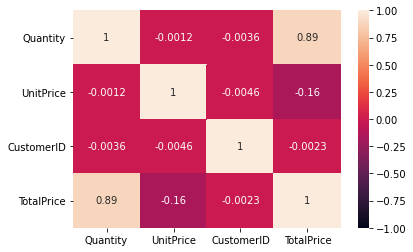

In [208]:
sns.heatmap(df.corr(),annot=True,vmin=-1)

quantidade se correlaciona bem com o total price.

# Pergunta: Existem ainda colunas com valores nulos?

In [209]:
df.drop(columns=['CustomerID'],axis=1,inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France,16.60


In [210]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France,16.60


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   Country      540455 non-null  object 
 7   TotalPrice   540455 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 37.1+ MB


<AxesSubplot:>

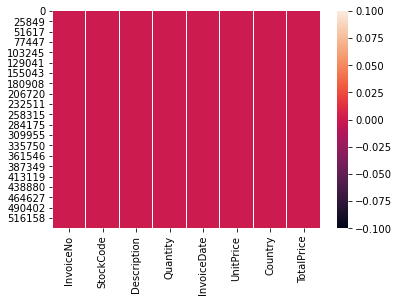

In [212]:
sns.heatmap(df.isnull())

# Pergunta: Existem valores negativos em 'Quantity' e 'UnitPrice'?

In [213]:
df[df['Quantity']  < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,United Kingdom,-1.25


In [214]:
df[df['Quantity']  == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice


In [215]:
df[df['Quantity']  < 0].Description.value_counts()

Manual                                244
REGENCY CAKESTAND 3 TIER              181
POSTAGE                               126
check                                 120
JAM MAKING SET WITH JARS               87
                                     ... 
EASTER BUNNY HANGING GARLAND            1
NOEL WOODEN BLOCK LETTERS               1
ASSTD DESIGN 3D PAPER STICKERS          1
FOLKART STAR CHRISTMAS DECORATIONS      1
Display                                 1
Name: Description, Length: 2110, dtype: int64

In [216]:
df[df['UnitPrice']  < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,United Kingdom,-11062.06


In [217]:
df[df['UnitPrice']  == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
6391,536941,22734,amazon,20,12/3/2010 12:08,0.0,United Kingdom,0.0
6392,536942,22139,amazon,15,12/3/2010 12:08,0.0,United Kingdom,0.0
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,United Kingdom,-0.0
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,Germany,0.0
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,United Kingdom,-0.0
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,United Kingdom,-0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,United Kingdom,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,United Kingdom,0.0


In [218]:
df[df['UnitPrice']  == 0].Description.value_counts()

check                             159
?                                  47
damages                            45
damaged                            43
found                              25
                                 ... 
SET OF 6 NATIVITY MAGNETS           1
DOORMAT HOME SWEET HOME BLUE        1
MINI LIGHTS WOODLAND MUSHROOMS      1
Dotcom                              1
PLASTERS IN TIN SKULLS              1
Name: Description, Length: 376, dtype: int64

([<matplotlib.patches.Wedge at 0x287565e8ca0>,
 [Text(1.0982294654500444, 0.062386226182625015, 'Quantidade'),
  Text(1.0921329642878228, 0.13132245929730832, 'Preço'),
  Text(-1.0978230142922392, -0.06917101481330377, 'Dataset')])

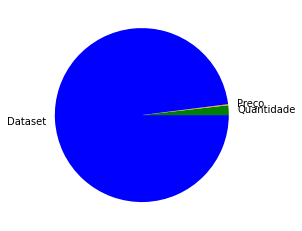

In [219]:
qntd = len(df[df['Quantity']  < 0]) + len(df[df['Quantity']  == 0])
preco = len(df[df['UnitPrice']  < 0]) + len(df[df['UnitPrice']  == 0])
resto = len(df) - qntd - preco

plt.pie([qntd,preco,resto],labels=['Quantidade','Preço','Dataset'],colors=['green','orange','blue'])

respostas:
- Todas colunas não possuem valores nulos
- Não existem compras com 0 vezes compradas
- Existem compras com valores negativos (pode indicar a venda de algum produto)
- Refound em duas compras
- Maioria dos produtos comprados sem valor, foram testes de compras ou produtos danificados
- Quantidade e preco com valores menores ou igual a 0 fazem parte de uma pequena area de todo dataframe

resultado:
- Retirada do dataset de valores menores ou iguais a 0 (tratamento de outliers)

In [220]:
idx_preco = df[df['UnitPrice']  == 0].index
idx_preco1 = df[df['UnitPrice']  < 0].index
idx_qntd = df[df['Quantity']  < 0].index

totalIndex = []

for i in idx_preco:
    totalIndex.append(i)
    
for i in idx_preco1:
    totalIndex.append(i)
    
for i in idx_qntd:
    totalIndex.append(i)


df.drop(totalIndex,axis=0,inplace=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France,16.60


# Proximos desafios 5/10

- Localizar principais produtos por pais (como se fosse por artesão) |done|
- Fazer relação de produto mais caro por quantidade |done|
- Transformar 'InvoiceDate' em datatime 

# Pergunta: Quais países mais compram produtos?

In [278]:
paises = df['Country'].value_counts().index[0:9]
values = df['Country'].value_counts().values[0:9]
outrosV = df['Country'].value_counts().values[8:].sum()

paises = np.append(paises,'Others')
values = np.append(values,outrosV)

paises

array(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain',
       'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Others'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x287562f3640>,
 [Text(-1.0587597478891215, 0.2983752607870906, 'United Kingdom'),
  Text(0.9674633222983016, -0.5234641535077001, 'Germany'),
  Text(1.0162018789584464, -0.42111012954015176, 'France'),
  Text(1.0519868117172044, -0.3214401156873098, 'EIRE'),
  Text(1.0697045375668182, -0.25638292125053863, 'Spain'),
  Text(1.076603229271742, -0.2256667603384618, 'Netherlands'),
  Text(1.082094828288336, -0.19766330613352814, 'Belgium'),
  Text(1.086461503891119, -0.17205057559522552, 'Switzerland'),
  Text(1.0897583185394073, -0.14975582517606392, 'Portugal'),
  Text(1.0977586724304829, -0.07018473554601518, 'Others')])

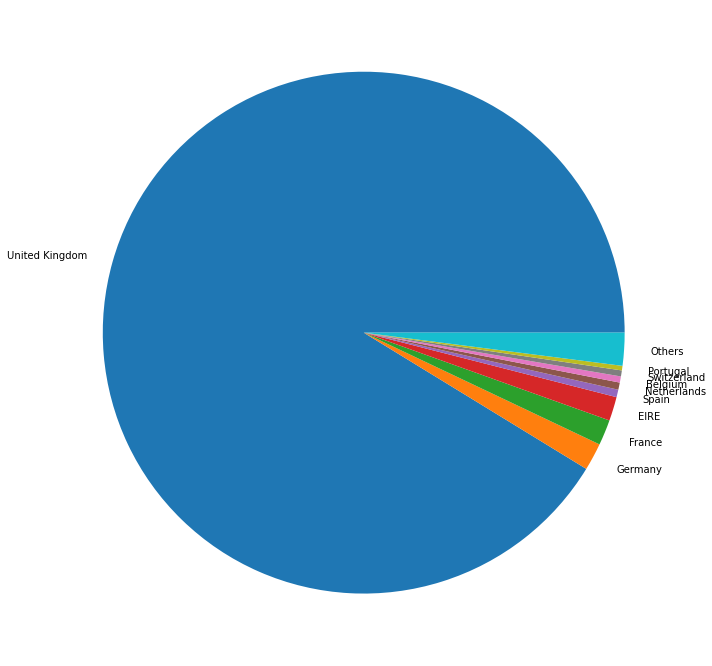

In [279]:
plt.figure(figsize=(18, 12))
plt.pie(values,labels=paises)

R: Grande maior parte das compras foram efetuadas no reino unido

# Pergunta:  Quais os 5 principais produtos do reino unido?

In [231]:
df[df['Country'] == df['Country'].value_counts().index[0]].Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2227
JUMBO BAG RED RETROSPOT               1957
REGENCY CAKESTAND 3 TIER              1710
PARTY BUNTING                         1614
LUNCH BAG RED RETROSPOT               1421
                                      ... 
Adjust bad debt                          1
RED PURSE WITH PINK HEART                1
WHITE ANEMONE ARTIFICIAL FLOWER          1
MARIE ANTOIENETT TRINKET BOX GOLD        1
TEA TIME BREAKFAST BASKET                1
Name: Description, Length: 4007, dtype: int64

In [284]:
ukP = df[df['Country']=='United Kingdom'].Description.value_counts().index[0:5]
ukV = df[df['Country']=='United Kingdom'].Description.value_counts().values[0:5]

<BarContainer object of 5 artists>

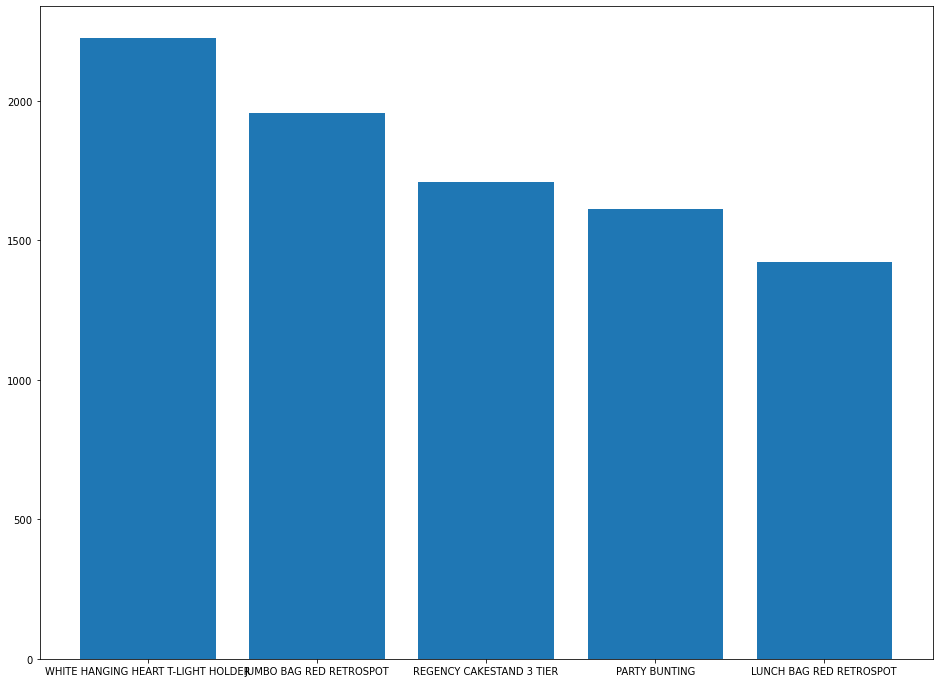

In [286]:
plt.figure(figsize=(16, 12))
plt.bar(ukP,height=ukV)

In [289]:
white = df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].TotalPrice.sum()
jumbo = df[df['Description']=='JUMBO BAG RED RETROSPOT'].TotalPrice.sum()
regency = df[df['Description']=='REGENCY CAKESTAND 3 TIER'].TotalPrice.sum()
party = df[df['Description']=='PARTY BUNTING'].TotalPrice.sum()
lunch = df[df['Description']=='LUNCH BAG RED RETROSPOT'].TotalPrice.sum()

<BarContainer object of 5 artists>

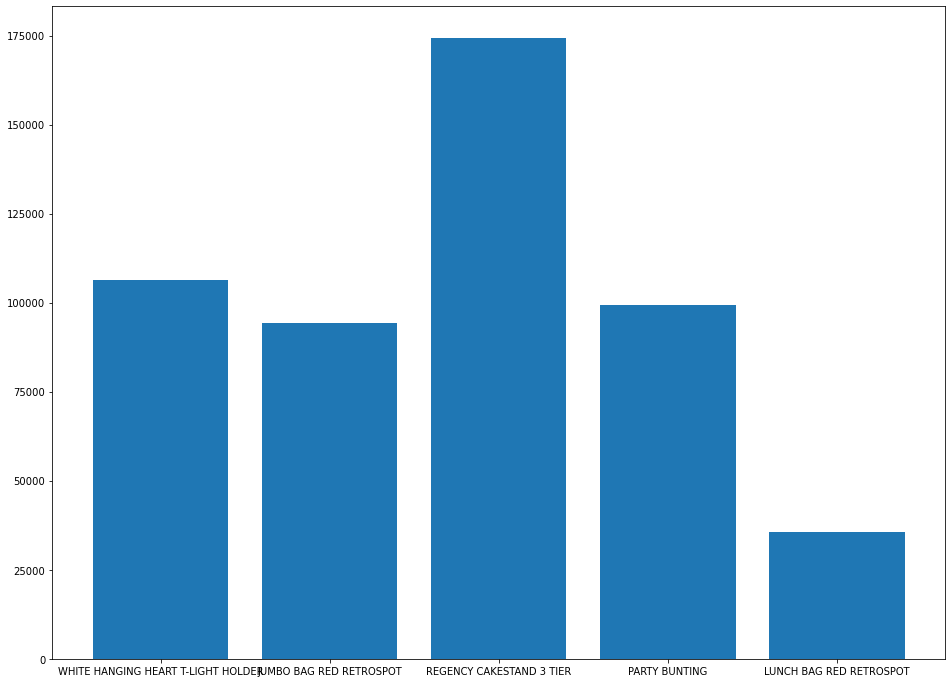

In [290]:
plt.figure(figsize=(16, 12))
plt.bar(ukP,height=[white,jumbo,regency,party,lunch])

In [296]:
print(df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].UnitPrice.mean(),df[df['Description']=='REGENCY CAKESTAND 3 TIER'].UnitPrice.mean())

3.216947912182448 13.976926127912733


In [297]:
print(df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].Quantity.sum(),df[df['Description']=='REGENCY CAKESTAND 3 TIER'].Quantity.sum())

37891 13879


In [298]:
white = df[df['Description']=='WHITE HANGING HEART T-LIGHT HOLDER'].UnitPrice.mean()
jumbo = df[df['Description']=='JUMBO BAG RED RETROSPOT'].UnitPrice.mean()
regency = df[df['Description']=='REGENCY CAKESTAND 3 TIER'].UnitPrice.mean()
party = df[df['Description']=='PARTY BUNTING'].UnitPrice.mean()
lunch = df[df['Description']=='LUNCH BAG RED RETROSPOT'].UnitPrice.mean()

<BarContainer object of 5 artists>

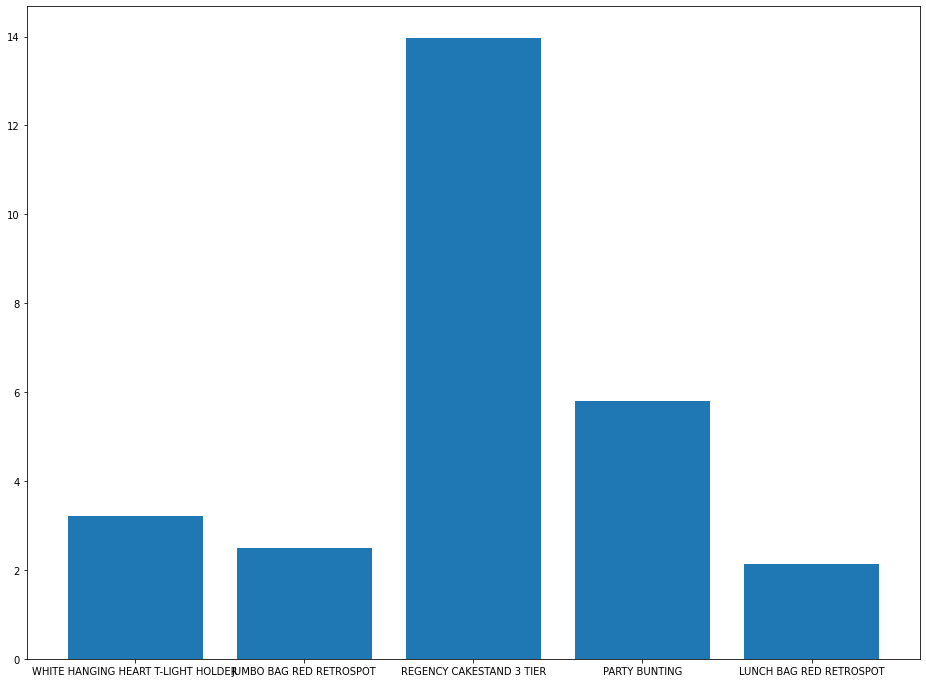

In [300]:
plt.figure(figsize=(16, 12))
plt.bar(ukP,height=[white,jumbo,regency,party,lunch])

Como podemos perceber, o produto mais caro é o 'REGENCY CAKESTAND 3 TIER' e ele é o terceiro mais vendido. comparando o preço medio unitario do 'REGENCY CAKESTAND 3 TIER' foi por volta de 4x mais caro que o do 'WHITE HANGING HEART T-LIGHT HOLDER', produto mais comprado no reino unido, e teve menos da metade de vezes comprando-os

# Pergunta: Qual produto o site deveria repor mais o estoque? 

- Avaliação de metricas e de indicadores 1: Pelo fato do 'WHITE HANGING HEART T-LIGHT HOLDER' ser o produto mais escolhido e por ser um dos mais baratos para comprar, é um dos que vale a pena repor. 

- Avaliação de metricas e de indicadores 2: Já o 'LUNCH BAG RED RETROSPOT', por ser o menos vendido entre os 5 e por ter um preço medio unitario mais baixo, seria melhor fazer um repoimento mais especifico, por exemplo: pedidos feito por encomenda,  todavia ele é um produto do Reino Unido, então poderiam colocar alguns produtos no estoque caso seja feita uma encomenda muito grande.

- Avaliação de metricas e de indicadores 3: Assim como a avaliação 1, o 'REGENCY CAKESTAND 3 TIER' é o terceito mais vendido e o que tem o maior preço medio, então vale a pena repor nos estoques, porêm deve se ter cuidado com os cooonsumidores, talvez eles fiquem insatisfeitos. 

- Avaliação de metricas e de indicadores 4: Avaliando entre os paises, valeria mais a pena repor produtos do reino unido, da alemanha e frança, produtos pedido em Others, seria melhor ser efetuado por encomenda.